# Assignment: Project-3 - Supervised Learning

#### submitted by Subodh Nath Pushpak

The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed. 
### Domain: BFSI  
### Context
Leveraging customer information is paramount for most businesses. In the case of a bank,
attributes of customers like the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.

### Objective
#### The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Task 1.  Import the necessary libraries

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix

In [262]:
# User defined functions

# Print the output of various algo in nice format with score, recall, precision, specificity, f1_score
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # for the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score_train = round(model.score(X_train, y_train), 3) # accuracy for train data
    
    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    
    return score_train, score, recall, precision, specificity, f1_score  # return all the metrics

## 2. Read the data as a data frame

In [263]:
# loading the data
data_df= pd.read_csv('bank-full.csv')
data_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

## 3. Perform basic EDA which should include the following and print out your insights at every step.

### 3a. Shape of the data

In [264]:
rows, cols = data_df.shape # shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 45211 observations / rows and 17 attributes / columns


### 3b. Data type of each attribute

In [265]:
data_df.info() # Info on each of the attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [266]:
data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

### Inference 
1. age (numeric)
2. job : type of job (categorical:'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed',
'services','student','technician','unemployed','unknown')
3. marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced'means divorced or widowed)
4. education (categorical:'primary','tertiary','secondary'and'unknown')
5. default: has credit in default? (categorical:'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical:'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
    
    
9. contact: contact communication type (categorical:'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11.month: last contact month of year (categorical: 'jan', 'feb','mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric).Important note: this attribute highly affects the output
target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end
of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be
discarded if the intention is to have a realistic predictive model.
   
   
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes lastcontact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric;999 means
client was not previously contacted)
15.previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
   
  
  
17.Target: has the client subscribed a term deposit? (binary:"yes","no")

### 3c. Checking the presence of missing values

In [267]:
# determine if any value is null
data_df.isnull().values.any() 

False

In [268]:
# determine the sum of na values
data_df.apply(lambda x : sum(x.isnull()))

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [269]:
# determine unique values of columns
for colIndex in data_df.columns:
  print(colIndex)
  print(data_df[colIndex].unique())
  print('---\n')

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
---

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
---

marital
['married' 'single' 'divorced']
---

education
['tertiary' 'secondary' 'unknown' 'primary']
---

default
['no' 'yes']
---

balance
[ 2143    29     2 ...  8205 14204 16353]
---

housing
['yes' 'no']
---

loan
['no' 'yes']
---

contact
['unknown' 'cellular' 'telephone']
---

day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
---

month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
---

duration
[ 261  151   76 ... 1298 1246 1556]
---

campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 

### inference
* There are **NO missing values** in the given data.

In [270]:
data_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [271]:
data_df_obj=pd.DataFrame(data_df.select_dtypes(include='object'))
data_df_obj.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

* There are 10 categorical variables

In [272]:
# Explore the categorical columns / features 
data_df.describe(include=["object"])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome Target  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922

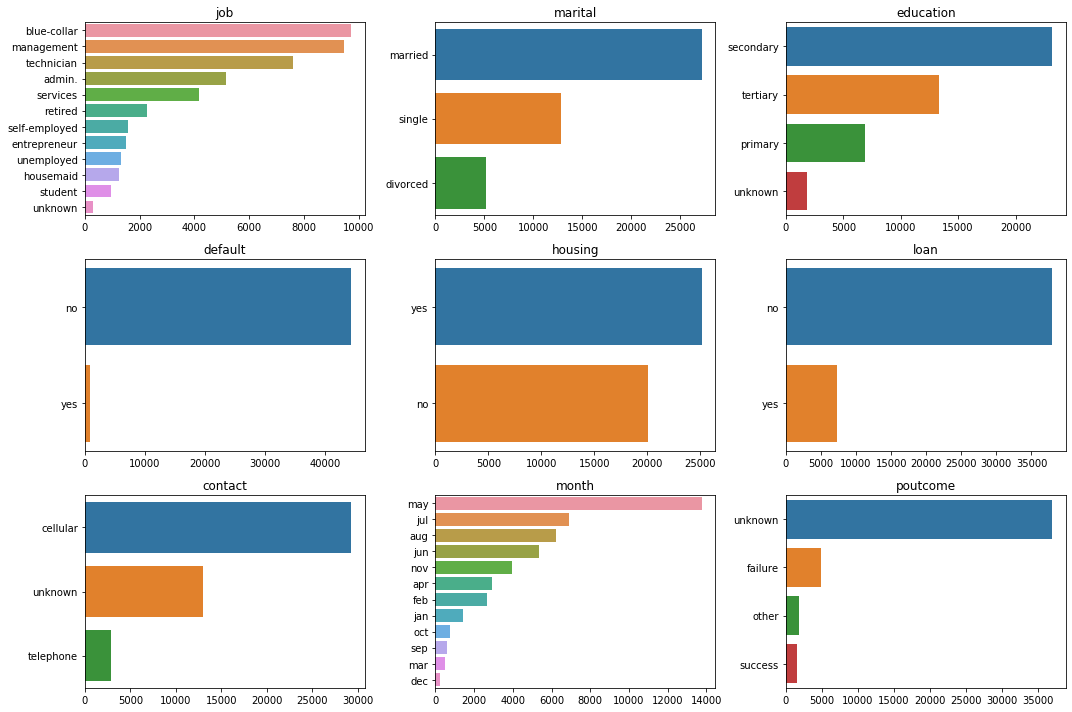

In [273]:
# Explore the categorical columns / features visually
data_df_obj=pd.DataFrame(data_df.select_dtypes(include='object'))
plt.figure(figsize= (15,10))
plt_index = 1
totalrows, totalcols = data_df_obj.shape
for col in data_df_obj.columns:
    if(plt_index < totalcols):
        plt.subplot(3,3,plt_index)
        #sns.countplot(data_df[col])
        sns.barplot(data_df_obj[col].value_counts().values, data_df_obj[col].value_counts().index)
        plt.title(col)
        plt.tight_layout()
        plt_index = plt_index + 1

### 3d. 5 Point summary of numerical attributes

In [274]:
# Eye ball the data
data_df.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

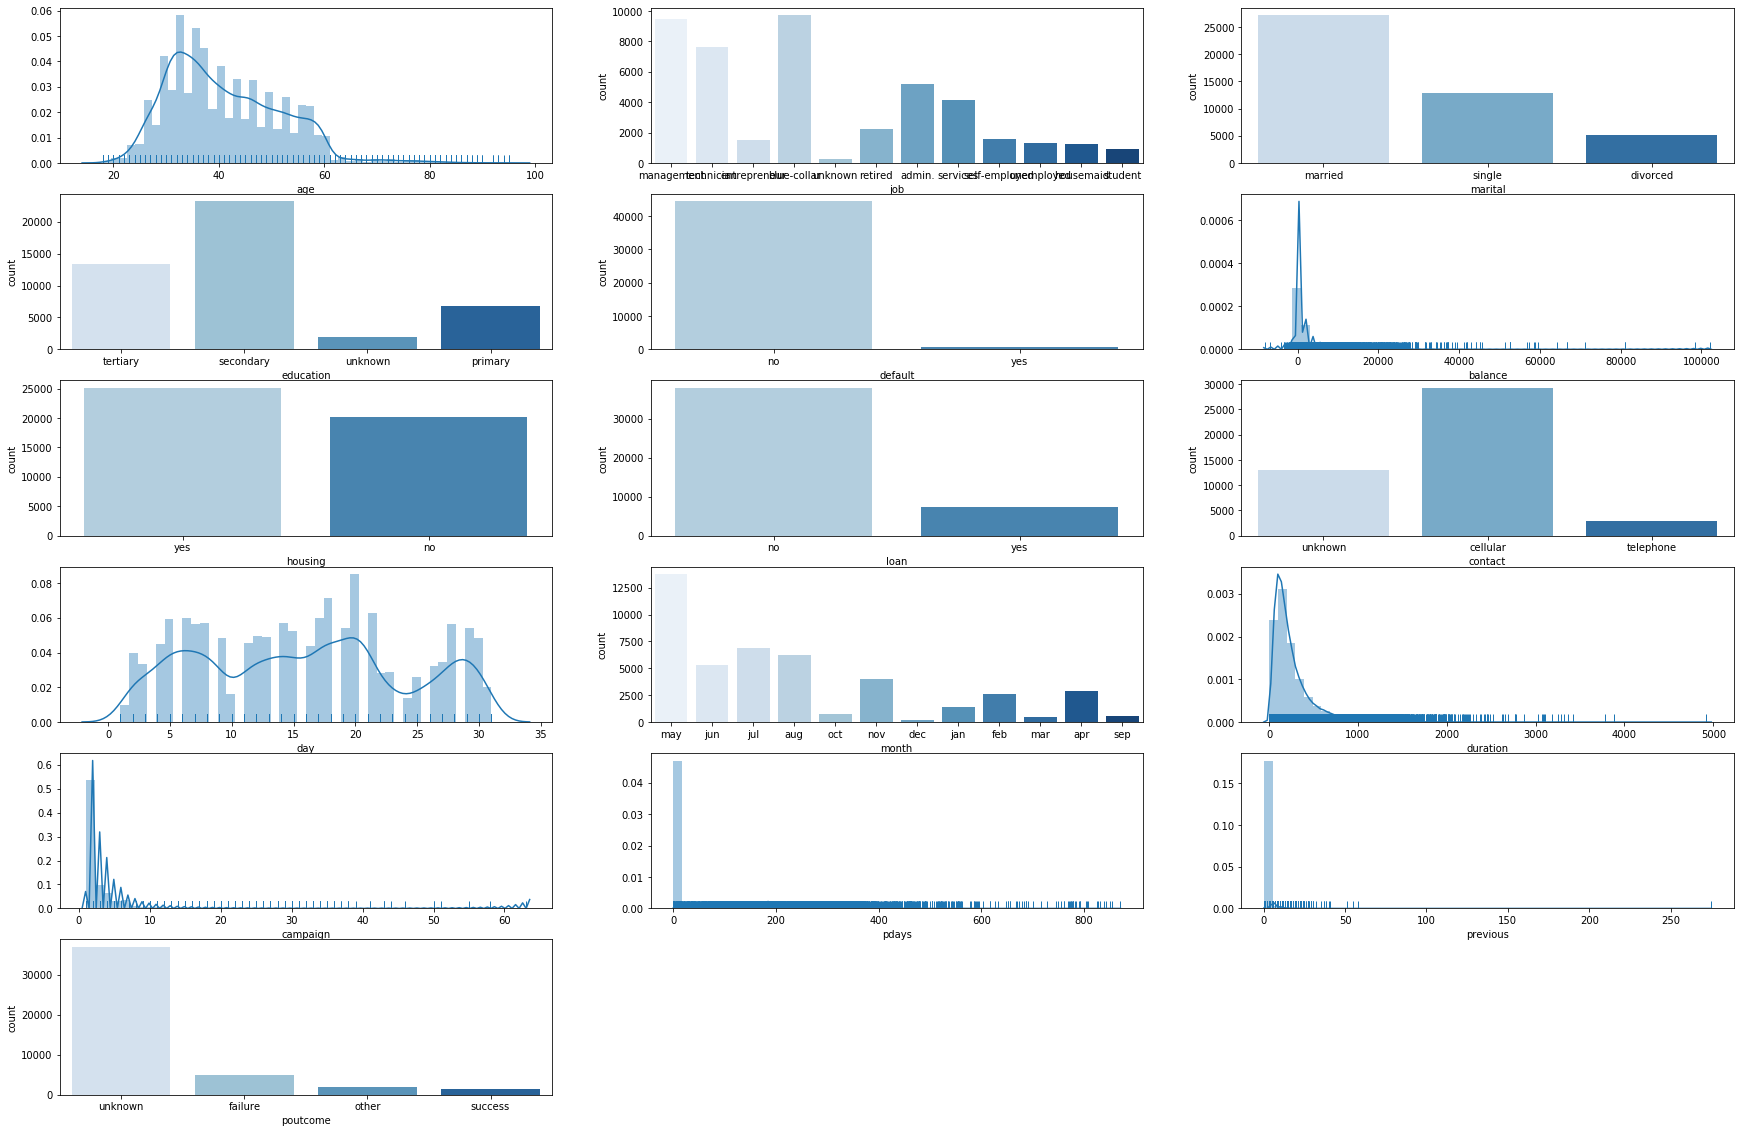

In [275]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
totalrows, totalcols = data_df.shape
categorical_vars = data_df.describe(include=["object"]).columns
continuous_vars = data_df.describe().columns
for feature in data_df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    if(pos < totalcols):
        plt.subplot(6, 3, pos)   # plot grid
        if feature in continuous_vars:   # Plot histogram for all the continuous columns
             sns.distplot(data_df[feature], kde= True,rug = True )   
        else:
            sns.countplot(data_df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
            #sns.barplot(data_df[feature].value_counts().values, data_df[feature].value_counts().index)
        pos += 1  # to plot over the grid one by one  

In [276]:
# List numerical columns
numerical_cols = list(data_df.select_dtypes(exclude=['object']))
numerical_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

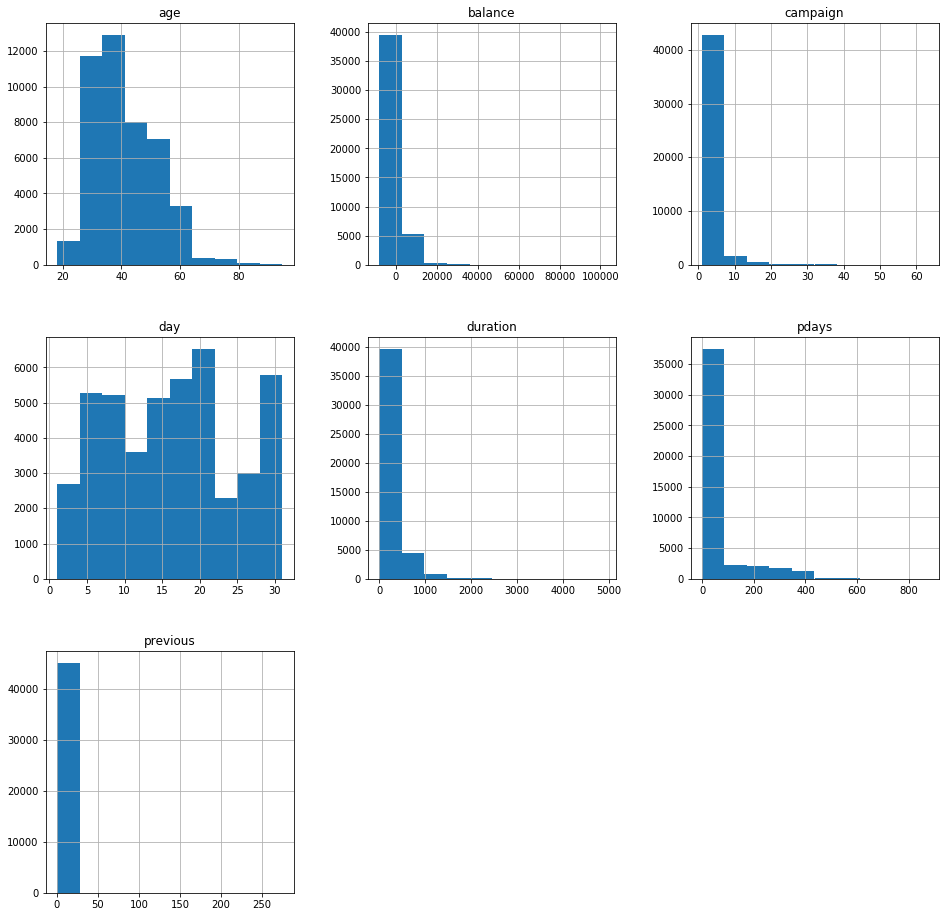

In [277]:
_= data_df.hist(column=numerical_cols, figsize = (16,16))

In [278]:
print(f"Skweness is: \n{data_df.skew()}")

Skweness is: 
age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


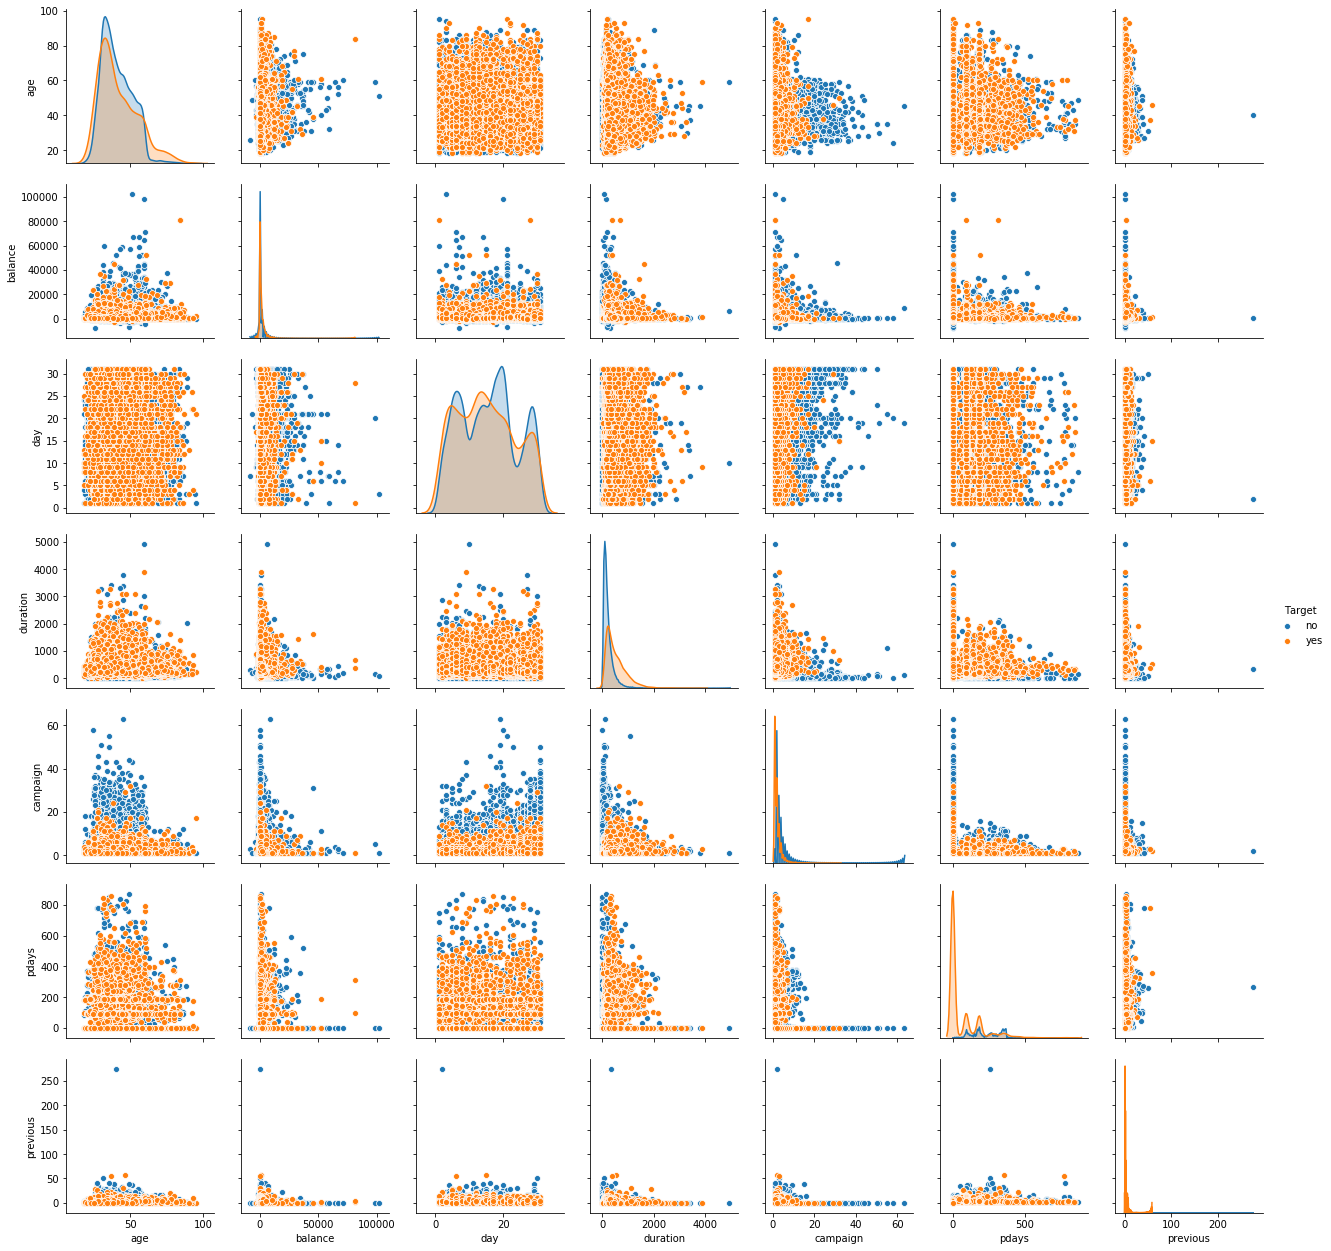

In [279]:
sns.pairplot(data_df,hue='Target',diag_kind='kde')
plt.show()

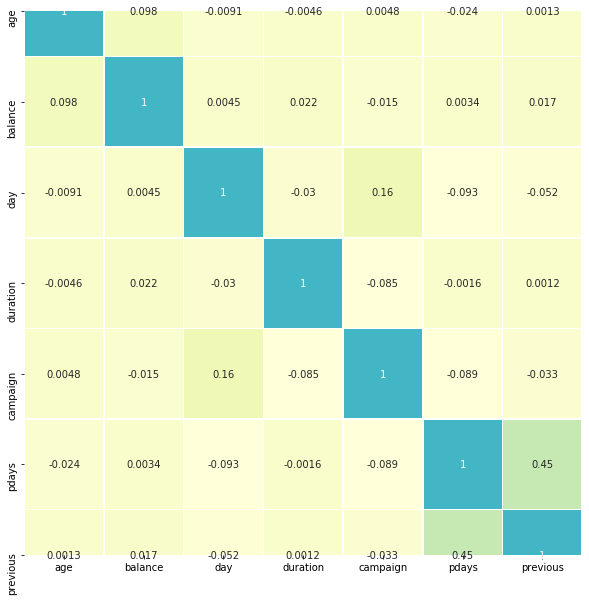

In [280]:
plt.figure(figsize=(10,10))
sns.heatmap(data_df.corr(),
            annot=True,
            linewidths=.5,
            center=1,
            cbar=False,
            cmap="YlGnBu")
plt.show()

### inference
* Age data is moderately skewed.
* balance is highly skewed and contains lot of outliers.
* campaign is highly skewed and has very long tail on right.
* day seems fine with very low skweness. However its multimodal.
* duration is highly skewed. 
* none of the variables seems to be highly correlated to each other

### 3e. Checking the presence of outliers

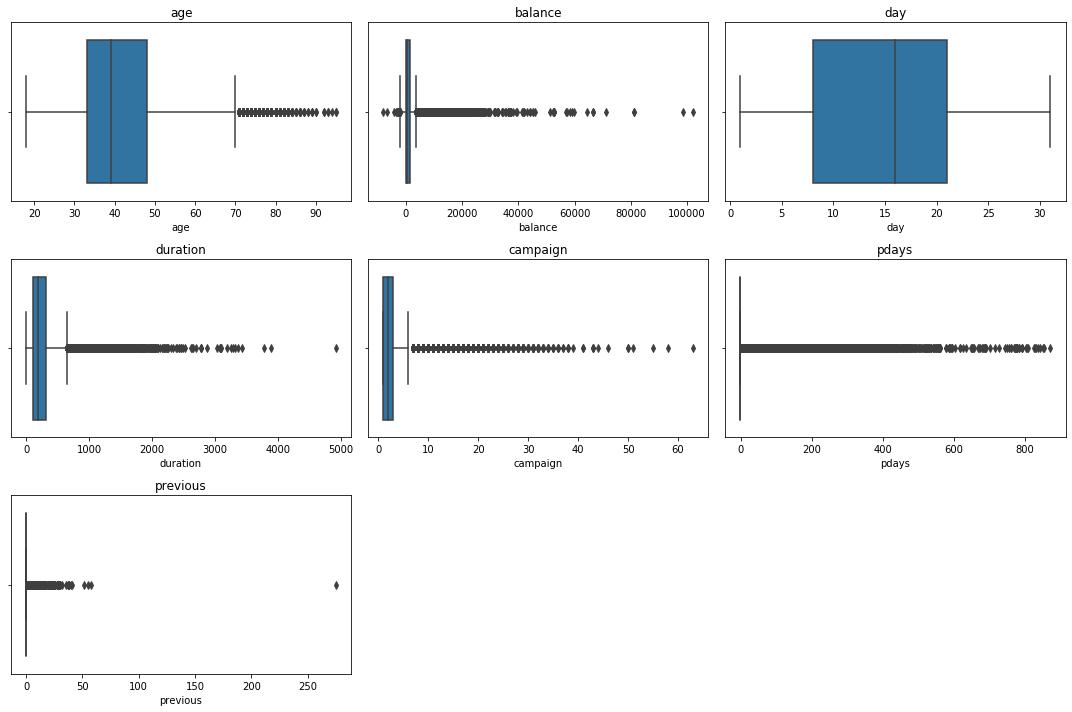

In [281]:
# Explore the Numerical columns / features visually for outliers using boxplot
data_df_Numerical=data_df.select_dtypes(exclude=['object'])
plt.figure(figsize= (15,10))
plt_index = 1
totalrows, totalcols = data_df_obj.shape
for col in data_df_Numerical.columns:
    if(plt_index < totalcols):
        plt.subplot(3,3,plt_index)
        sns.boxplot(data_df[col])
        plt.title(col)
        plt.tight_layout()
        plt_index = plt_index + 1

### inference
* balance have large number of ourliers and needs to be celaned. Using mean +_3*std for cleaning outliers
* campaign contains lot of outliers, it needs to be checked. 
* duration also contains outliers which we need to clean
* pdays, max respondents has value as -1. However days cant be -1, assuming they are ones who were not previously contacted

In [282]:
data_df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

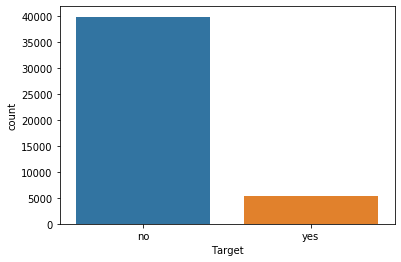

In [283]:
sns.countplot(x='Target',data=data_df)

* Count of clients that didnt subsribe to Term deposit  = 39922 # "NO"
* Count of clients that subsribed to Term deposit = 5289 # "YES" (clients subscribed to term deposit) 

### 4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. 

### Inference 
There are unknown values for many variables in the Data set. There are many ways to handle missing data. 
* One of the ways is to drop the unknown values rows but that would lead to a reduction of data set and might effect  predictions.
* Fill in the unknown values with valid assumptions. We can use binning to put oulier data into proper bins of categories

In [284]:
data_df['balance'].value_counts()
pd.crosstab(data_df['balance'],data_df['Target'])

Target   no  yes
balance         
-8019     1    0
-6847     1    0
-4057     1    0
-3372     1    0
-3313     1    0
...      ..  ...
 66721    1    0
 71188    1    0
 81204    0    2
 98417    1    0
 102127   1    0

[7168 rows x 2 columns]

In [285]:
#Binning Balance for outliers and later in one hot recoding
def bal_group(series):
    if series < 0:
        return "negative balance"
    elif 0 <= series < 500:
        return "low balance"
    elif 500 <= series < 2000:
        return "moderate balance"
    elif 2000 <= series < 10000:
        return "high balance"
    elif series >= 10000:
        return "very high balance"

data_df['bal_group'] = data_df['balance'].apply(bal_group)
data_df['bal_group'].value_counts()
pd.crosstab(data_df['bal_group'],data_df['Target'])

Target                no   yes
bal_group                     
high balance        6403  1274
low balance        17899  1972
moderate balance   11370  1698
negative balance    3556   210
very high balance    694   135

In [286]:
#Binning Campaign for outliers
def camp_group(series):
    if series <= 1:
        return "1 Contact only"
    elif 2 <= series <= 5:
        return "2-5 Contacts"
    elif 6 <= series <= 10:
        return "6-10 Contacts"
    elif series > 10:
        return "More than 10 Contacts"

data_df['camp_group'] = data_df['campaign'].apply(camp_group)
data_df['camp_group'].value_counts()
pd.crosstab(data_df['camp_group'],data_df['Target'])

Target                    no   yes
camp_group                        
1 Contact only         14983  2561
2-5 Contacts           20837  2475
6-10 Contacts           2953   206
More than 10 Contacts   1149    47

In [287]:
#Binning duration for outliers
def dura_group(series):
    if series <= 120:
        return "< 2 mints Duration"
    elif 120 < series <= 600:
        return " 2-10 mints Duration"
    elif 600 < series <= 1800:
        return " 10-30 mints Contacts"
    elif  series > 1800 :
        return "More than 30 mints Contacts"

data_df['dura_group'] = data_df['duration'].apply(dura_group)
pd.crosstab(data_df['dura_group'],data_df['Target'])

Target                          no   yes
dura_group                              
 10-30 mints Contacts         1905  1778
 2-10 mints Duration         24132  3245
< 2 mints Duration           13833   211
More than 30 mints Contacts     52    55

In [288]:
# Keep the binned columns and delete the contineous columns  
data_df_Original= data_df.copy() # keep a copy in orginal for backup; in case approach revist is requited
data_df.drop(['balance','campaign'],axis=1,inplace=True)

In [289]:
data_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group'],
      dtype='object')

In [290]:
#Converting day to categorical
data_df['day']=data_df['day'].astype('category')
data_df['Target']=data_df['Target'].astype('category')

In [291]:
data_df.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
day           category
month           object
duration         int64
pdays            int64
previous         int64
poutcome        object
Target        category
bal_group       object
camp_group      object
dura_group      object
dtype: object

In [292]:
# Creating dummy variables for categorical variables
data_df_obj=pd.DataFrame(data_df.select_dtypes(include='object'))
data_df_obj=pd.get_dummies(data_df_obj) # ONE HOT RECODING
data_df_withdummyVariables = pd.concat([data_df,data_df_obj], axis=1)
print(data_df_withdummyVariables.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
      

In [293]:
# drop the columns for which we have created dummy variables
data_df = data_df_withdummyVariables.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 
                          'month','bal_group', 'camp_group','duration','poutcome','dura_group'],axis=1)

In [294]:
rows, cols = data_df.shape # shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 45211 observations / rows and 61 attributes / columns


In [295]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 61 columns):
age                                       45211 non-null int64
pdays                                     45211 non-null int64
previous                                  45211 non-null int64
Target                                    45211 non-null category
job_admin.                                45211 non-null uint8
job_blue-collar                           45211 non-null uint8
job_entrepreneur                          45211 non-null uint8
job_housemaid                             45211 non-null uint8
job_management                            45211 non-null uint8
job_retired                               45211 non-null uint8
job_self-employed                         45211 non-null uint8
job_services                              45211 non-null uint8
job_student                               45211 non-null uint8
job_technician                            45211 non-null uint8
job_un

In [296]:
#Test Train Split
X=data_df.drop(['Target'],axis=1)
y=data_df['Target']

In [297]:
# split data in 70 / 30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape,X_test.shape

((31647, 60), (13564, 60))

### 5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics

In [298]:
# Store the results from algoritms in results for easy evaluation
result = pd.DataFrame({'Model' : [ 'Training Score','Accuracy','Recall','Precision','Specificity','F1 Score']})
result.T

0         1       2          3            4         5
Model  Training Score  Accuracy  Recall  Precision  Specificity  F1 Score

### Linear Regression

In [299]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear')
result['Linear Regression'] = fit_n_print(lr, X_train, X_test, y_train, y_test )
result.T

0         1       2          3            4  \
Model              Training Score  Accuracy  Recall  Precision  Specificity   
Linear Regression           0.899     0.896   0.349      0.587        0.968   

                          5  
Model              F1 Score  
Linear Regression     0.438

### Naive Bayes

In [300]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
result['Naive Bayes'] =  fit_n_print(nb, X_train, X_test, y_train, y_test )
result.T

0         1       2          3            4  \
Model              Training Score  Accuracy  Recall  Precision  Specificity   
Linear Regression           0.899     0.896   0.349      0.587        0.968   
Naive Bayes                 0.855     0.849   0.573      0.398        0.886   

                          5  
Model              F1 Score  
Linear Regression     0.438  
Naive Bayes            0.47

### K Neartest Neighbour

In [301]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
result['KNN'] =  fit_n_print(knn, X_train, X_test, y_train, y_test )
result.T

0         1       2          3            4  \
Model              Training Score  Accuracy  Recall  Precision  Specificity   
Linear Regression           0.899     0.896   0.349      0.587        0.968   
Naive Bayes                 0.855     0.849   0.573      0.398        0.886   
KNN                         0.909     0.883   0.224      0.495         0.97   

                          5  
Model              F1 Score  
Linear Regression     0.438  
Naive Bayes            0.47  
KNN                   0.308

### Support Vector Machine

In [303]:
from sklearn.svm import SVC
svm = SVC(gamma = 'auto') #svc = SVC(C= .1, kernel='linear', gamma= 1) # (kernel='rbf')  (kernel='poly')  (kernel='sigmoid')
result['SVC'] =  fit_n_print(svm, X_train, X_test, y_train, y_test )
result.T

0         1       2          3            4  \
Model              Training Score  Accuracy  Recall  Precision  Specificity   
Linear Regression           0.899     0.896   0.349      0.587        0.968   
Naive Bayes                 0.855     0.849   0.573      0.398        0.886   
KNN                         0.909     0.883   0.224      0.495         0.97   
SVC                         0.899     0.891   0.134      0.645         0.99   

                          5  
Model              F1 Score  
Linear Regression     0.438  
Naive Bayes            0.47  
KNN                   0.308  
SVC                   0.222

### Decision Trees

In [304]:
from sklearn.tree import DecisionTreeClassifier

In [305]:
# Using default 'gini' criteria to split. Other option include 'entropy'.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [306]:
print(dTree.score(X_train, y_train)) # train data
print(dTree.score(X_test, y_test)) #test data

0.996650551395077
0.8703922146859333


In [307]:
# use 'entropy' criteria to split instead of default gini
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(X_train, y_train)
print(model_entropy.score(X_train, y_train))  # performance on train data
print(model_entropy.score(X_test, y_test))  # performance on test data

0.996650551395077
0.8693600707755824


In [308]:
result['Decision Trees']  = fit_n_print(model_entropy, X_train, X_test, y_train, y_test )
result.T

0         1       2          3            4  \
Model              Training Score  Accuracy  Recall  Precision  Specificity   
Linear Regression           0.899     0.896   0.349      0.587        0.968   
Naive Bayes                 0.855     0.849   0.573      0.398        0.886   
KNN                         0.909     0.883   0.224      0.495         0.97   
SVC                         0.899     0.891   0.134      0.645         0.99   
Decision Trees              0.997     0.869   0.464      0.441        0.922   

                          5  
Model              F1 Score  
Linear Regression     0.438  
Naive Bayes            0.47  
KNN                   0.308  
SVC                   0.222  
Decision Trees        0.452

### inference
* The model is an overfit both for entropy and gini 
* Regularize / prune the decision tree by limiting the max. depth of trees 

In [309]:
# regularizing the tree with 'criterion': 'entropy', 'max_features': 40, 'min_samples_leaf': 50,
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=14, min_samples_leaf=50)
result['Decision Trees (With Pruning)'] = fit_n_print(clf_pruned, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493

### Inference
* When the tree is regularaised, overfitting is reduced, but there is only slight increase in accuracy

In [310]:
## Calculating feature importance
dt_imp_feature=pd.DataFrame(clf_pruned.feature_importances_, columns = ["Imp"], index = X_train.columns)
dt_imp_feature.sort_values(by="Imp",ascending=False)[:15] #[:15] listing first 15

Imp
dura_group_ 10-30 mints Contacts  0.262333
poutcome_success                  0.210130
dura_group_< 2 mints Duration     0.107349
contact_unknown                   0.079296
housing_no                        0.047417
pdays                             0.041363
age                               0.040890
month_jul                         0.027716
month_aug                         0.021939
month_feb                         0.014930
month_may                         0.014267
month_jun                         0.013183
month_nov                         0.011716
month_jan                         0.011290
camp_group_1 Contact only         0.010345

In [311]:
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493

### Inference
* Decision tree has the max performance score with reasonable confusion matrix numbers. The classification report for the decision tree also has better numbers than other algorithms.
* From the above models scores and confusion matrix it is clear that the best performace is of Decision Tree followed by Linear Regression and SVC

### 6. Build the ensemble models and compare the results with the base models. Note:
Random forest can be used only with Decision trees

### Adaboost

In [312]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)
print(acc_AB)

0.8957534650545562


In [313]:
result['Ada Boosting'] =  fit_n_print(abcl, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314

### Bagging Classifier 

In [314]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
result['Bagging Classifier'] =  fit_n_print(bgcl, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   
Bagging Classifier                      0.988     0.893   0.425       0.55   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314  
Bagging Classifier                   0.954     0.479

### GradientBoost Classifier

In [315]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
result['GradientBoost Classifier'] =  fit_n_print(gbcl, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   
Bagging Classifier                      0.988     0.893   0.425       0.55   
GradientBoost Classifier                0.902     0.898   0.288      0.641   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314  
Bagging Classifier                   0.954     0.479  
GradientBoost Classifier             0.979     0.397

### Random Forest

In [317]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
result['Random Forest'] =  fit_n_print(rfcl, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   
Bagging Classifier                      0.988     0.893   0.425       0.55   
GradientBoost Classifier                0.902     0.898   0.288      0.641   
Random Forest                           0.996     0.893   0.414      0.554   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314  
Bagging Classifier                   0.954     0.479  
GradientBoost Classifier             0.979     0.397  
Random Forest                        0.956     0.474

In [326]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(warm_start=True, n_estimators=80,
                            max_depth=9,
                            max_features = 16, 
                            criterion = 'entropy')
result['Random Forest (Revised)'] =  fit_n_print(rf, X_train, X_test, y_train, y_test )
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   
Bagging Classifier                      0.988     0.893   0.425       0.55   
GradientBoost Classifier                0.902     0.898   0.288      0.641   
Random Forest                           0.996     0.893   0.414      0.554   
Random Forest (Revised)                 0.914     0.899   0.334      0.619   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314  
Bagging Classifier                   0.954     0.479  
GradientBoost Classifier             0.979     0.397  
Random Forest                        0.956     0.474  
Random Forest (Revised)              0.973     0.434

### 7. Compare performances of all the models 

In [327]:
result.T

0         1       2          3  \
Model                          Training Score  Accuracy  Recall  Precision   
Linear Regression                       0.899     0.896   0.349      0.587   
Naive Bayes                             0.855     0.849   0.573      0.398   
KNN                                     0.909     0.883   0.224      0.495   
SVC                                     0.899     0.891   0.134      0.645   
Decision Trees                          0.997     0.869   0.464      0.441   
Decision Trees (With Pruning)           0.905     0.895   0.439      0.561   
Ada Boosting                            0.896     0.896   0.205      0.672   
Bagging Classifier                      0.988     0.893   0.425       0.55   
GradientBoost Classifier                0.902     0.898   0.288      0.641   
Random Forest                           0.996     0.893   0.414      0.554   
Random Forest (Revised)                 0.914     0.899   0.334      0.619   

                                         4         5  
Model                          Specificity  F1 Score  
Linear Regression                    0.968     0.438  
Naive Bayes                          0.886      0.47  
KNN                                   0.97     0.308  
SVC                                   0.99     0.222  
Decision Trees                       0.922     0.452  
Decision Trees (With Pruning)        0.955     0.493  
Ada Boosting                         0.987     0.314  
Bagging Classifier                   0.954     0.479  
GradientBoost Classifier             0.979     0.397  
Random Forest                        0.956     0.474  
Random Forest (Revised)              0.973     0.434

## Inference
* Above is the comparision of various classification algorithms like Linear Regression, NB, KNN, SVC and decision Tree along with Essembling techniques like Ada boosting, bagging, Gradient boost and Random forest.
* Note that first column in above tabel is training score and is only for quick reference.
* As per nature of problem statement; we need to foucs more on accuracy than F1 score. Focus on F1 Score is required  to seek a balance between Precision and Recall. Accuracy is largely contributed by a large number of True Negatives.
* **Gradient Classifier** has the max performance score (Accuracy) with reasonable confusion matrix numbers followed by *Ada boosting*